# Minimal working example for 3D visualization of hyper-parameter tuning

## Imports

In [289]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Load the Iris dataset

In [290]:
iris = load_iris(as_frame=True)

## Split into X and y, and prepare for experimentation

In [291]:
X = iris.data

In [292]:
y = iris.target #pd.Series()

In [293]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [294]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [295]:
y.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

### Make the class label binary

In [296]:
y = pd.Series([a==1 for a in y])

<AxesSubplot:>

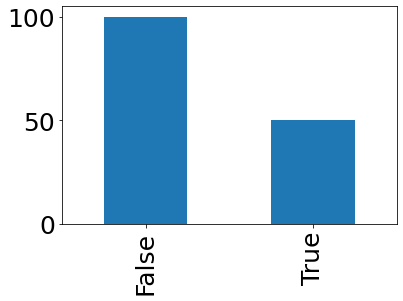

In [297]:
y.value_counts().plot(kind='bar')

## Partition the data

In [298]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## Define ranges for the hyper-parameters

In [299]:
max_depth_range = np.arange(2, 100, 2)
n_estimators_range = np.arange(2, 100, 2)

In [300]:
result = pd.DataFrame(columns=["max_depth", "n_estimators", "auprc"])

## Perform a grid search

In [301]:
for md in max_depth_range:
    for ne in n_estimators_range:
            print("running max_depth {0}, n_estimators {1}".format(md, ne))
            classifier = RandomForestClassifier(max_depth=md, n_estimators=ne)
            classifier.fit(x_train, y_train)
            prediction = classifier.predict_proba(x_test)[:,0]
            auprc = average_precision_score(y_test.values, prediction)
            result = result.append(pd.Series(
                [md, ne, auprc], index=result.columns), ignore_index=True)

running max_depth 2, n_estimators 2
running max_depth 2, n_estimators 4
running max_depth 2, n_estimators 6
running max_depth 2, n_estimators 8
running max_depth 2, n_estimators 10
running max_depth 2, n_estimators 12
running max_depth 2, n_estimators 14
running max_depth 2, n_estimators 16
running max_depth 2, n_estimators 18
running max_depth 2, n_estimators 20
running max_depth 2, n_estimators 22
running max_depth 2, n_estimators 24
running max_depth 2, n_estimators 26
running max_depth 2, n_estimators 28
running max_depth 2, n_estimators 30
running max_depth 2, n_estimators 32
running max_depth 2, n_estimators 34
running max_depth 2, n_estimators 36
running max_depth 2, n_estimators 38
running max_depth 2, n_estimators 40
running max_depth 2, n_estimators 42
running max_depth 2, n_estimators 44
running max_depth 2, n_estimators 46
running max_depth 2, n_estimators 48
running max_depth 2, n_estimators 50
running max_depth 2, n_estimators 52
running max_depth 2, n_estimators 54
runni

running max_depth 10, n_estimators 56
running max_depth 10, n_estimators 58
running max_depth 10, n_estimators 60
running max_depth 10, n_estimators 62
running max_depth 10, n_estimators 64
running max_depth 10, n_estimators 66
running max_depth 10, n_estimators 68
running max_depth 10, n_estimators 70
running max_depth 10, n_estimators 72
running max_depth 10, n_estimators 74
running max_depth 10, n_estimators 76
running max_depth 10, n_estimators 78
running max_depth 10, n_estimators 80
running max_depth 10, n_estimators 82
running max_depth 10, n_estimators 84
running max_depth 10, n_estimators 86
running max_depth 10, n_estimators 88
running max_depth 10, n_estimators 90
running max_depth 10, n_estimators 92
running max_depth 10, n_estimators 94
running max_depth 10, n_estimators 96
running max_depth 10, n_estimators 98
running max_depth 12, n_estimators 2
running max_depth 12, n_estimators 4
running max_depth 12, n_estimators 6
running max_depth 12, n_estimators 8
running max_dept

running max_depth 18, n_estimators 98
running max_depth 20, n_estimators 2
running max_depth 20, n_estimators 4
running max_depth 20, n_estimators 6
running max_depth 20, n_estimators 8
running max_depth 20, n_estimators 10
running max_depth 20, n_estimators 12
running max_depth 20, n_estimators 14
running max_depth 20, n_estimators 16
running max_depth 20, n_estimators 18
running max_depth 20, n_estimators 20
running max_depth 20, n_estimators 22
running max_depth 20, n_estimators 24
running max_depth 20, n_estimators 26
running max_depth 20, n_estimators 28
running max_depth 20, n_estimators 30
running max_depth 20, n_estimators 32
running max_depth 20, n_estimators 34
running max_depth 20, n_estimators 36
running max_depth 20, n_estimators 38
running max_depth 20, n_estimators 40
running max_depth 20, n_estimators 42
running max_depth 20, n_estimators 44
running max_depth 20, n_estimators 46
running max_depth 20, n_estimators 48
running max_depth 20, n_estimators 50
running max_dept

running max_depth 28, n_estimators 42
running max_depth 28, n_estimators 44
running max_depth 28, n_estimators 46
running max_depth 28, n_estimators 48
running max_depth 28, n_estimators 50
running max_depth 28, n_estimators 52
running max_depth 28, n_estimators 54
running max_depth 28, n_estimators 56
running max_depth 28, n_estimators 58
running max_depth 28, n_estimators 60
running max_depth 28, n_estimators 62
running max_depth 28, n_estimators 64
running max_depth 28, n_estimators 66
running max_depth 28, n_estimators 68
running max_depth 28, n_estimators 70
running max_depth 28, n_estimators 72
running max_depth 28, n_estimators 74
running max_depth 28, n_estimators 76
running max_depth 28, n_estimators 78
running max_depth 28, n_estimators 80
running max_depth 28, n_estimators 82
running max_depth 28, n_estimators 84
running max_depth 28, n_estimators 86
running max_depth 28, n_estimators 88
running max_depth 28, n_estimators 90
running max_depth 28, n_estimators 92
running max_

running max_depth 36, n_estimators 84
running max_depth 36, n_estimators 86
running max_depth 36, n_estimators 88
running max_depth 36, n_estimators 90
running max_depth 36, n_estimators 92
running max_depth 36, n_estimators 94
running max_depth 36, n_estimators 96
running max_depth 36, n_estimators 98
running max_depth 38, n_estimators 2
running max_depth 38, n_estimators 4
running max_depth 38, n_estimators 6
running max_depth 38, n_estimators 8
running max_depth 38, n_estimators 10
running max_depth 38, n_estimators 12
running max_depth 38, n_estimators 14
running max_depth 38, n_estimators 16
running max_depth 38, n_estimators 18
running max_depth 38, n_estimators 20
running max_depth 38, n_estimators 22
running max_depth 38, n_estimators 24
running max_depth 38, n_estimators 26
running max_depth 38, n_estimators 28
running max_depth 38, n_estimators 30
running max_depth 38, n_estimators 32
running max_depth 38, n_estimators 34
running max_depth 38, n_estimators 36
running max_dept

running max_depth 46, n_estimators 30
running max_depth 46, n_estimators 32
running max_depth 46, n_estimators 34
running max_depth 46, n_estimators 36
running max_depth 46, n_estimators 38
running max_depth 46, n_estimators 40
running max_depth 46, n_estimators 42
running max_depth 46, n_estimators 44
running max_depth 46, n_estimators 46
running max_depth 46, n_estimators 48
running max_depth 46, n_estimators 50
running max_depth 46, n_estimators 52
running max_depth 46, n_estimators 54
running max_depth 46, n_estimators 56
running max_depth 46, n_estimators 58
running max_depth 46, n_estimators 60
running max_depth 46, n_estimators 62
running max_depth 46, n_estimators 64
running max_depth 46, n_estimators 66
running max_depth 46, n_estimators 68
running max_depth 46, n_estimators 70
running max_depth 46, n_estimators 72
running max_depth 46, n_estimators 74
running max_depth 46, n_estimators 76
running max_depth 46, n_estimators 78
running max_depth 46, n_estimators 80
running max_

running max_depth 54, n_estimators 74
running max_depth 54, n_estimators 76
running max_depth 54, n_estimators 78
running max_depth 54, n_estimators 80
running max_depth 54, n_estimators 82
running max_depth 54, n_estimators 84
running max_depth 54, n_estimators 86
running max_depth 54, n_estimators 88
running max_depth 54, n_estimators 90
running max_depth 54, n_estimators 92
running max_depth 54, n_estimators 94
running max_depth 54, n_estimators 96
running max_depth 54, n_estimators 98
running max_depth 56, n_estimators 2
running max_depth 56, n_estimators 4
running max_depth 56, n_estimators 6
running max_depth 56, n_estimators 8
running max_depth 56, n_estimators 10
running max_depth 56, n_estimators 12
running max_depth 56, n_estimators 14
running max_depth 56, n_estimators 16
running max_depth 56, n_estimators 18
running max_depth 56, n_estimators 20
running max_depth 56, n_estimators 22
running max_depth 56, n_estimators 24
running max_depth 56, n_estimators 26
running max_dept

running max_depth 64, n_estimators 32
running max_depth 64, n_estimators 34
running max_depth 64, n_estimators 36
running max_depth 64, n_estimators 38
running max_depth 64, n_estimators 40
running max_depth 64, n_estimators 42
running max_depth 64, n_estimators 44
running max_depth 64, n_estimators 46
running max_depth 64, n_estimators 48
running max_depth 64, n_estimators 50
running max_depth 64, n_estimators 52
running max_depth 64, n_estimators 54
running max_depth 64, n_estimators 56
running max_depth 64, n_estimators 58
running max_depth 64, n_estimators 60
running max_depth 64, n_estimators 62
running max_depth 64, n_estimators 64
running max_depth 64, n_estimators 66
running max_depth 64, n_estimators 68
running max_depth 64, n_estimators 70
running max_depth 64, n_estimators 72
running max_depth 64, n_estimators 74
running max_depth 64, n_estimators 76
running max_depth 64, n_estimators 78
running max_depth 64, n_estimators 80
running max_depth 64, n_estimators 82
running max_

running max_depth 72, n_estimators 74
running max_depth 72, n_estimators 76
running max_depth 72, n_estimators 78
running max_depth 72, n_estimators 80
running max_depth 72, n_estimators 82
running max_depth 72, n_estimators 84
running max_depth 72, n_estimators 86
running max_depth 72, n_estimators 88
running max_depth 72, n_estimators 90
running max_depth 72, n_estimators 92
running max_depth 72, n_estimators 94
running max_depth 72, n_estimators 96
running max_depth 72, n_estimators 98
running max_depth 74, n_estimators 2
running max_depth 74, n_estimators 4
running max_depth 74, n_estimators 6
running max_depth 74, n_estimators 8
running max_depth 74, n_estimators 10
running max_depth 74, n_estimators 12
running max_depth 74, n_estimators 14
running max_depth 74, n_estimators 16
running max_depth 74, n_estimators 18
running max_depth 74, n_estimators 20
running max_depth 74, n_estimators 22
running max_depth 74, n_estimators 24
running max_depth 74, n_estimators 26
running max_dept

running max_depth 82, n_estimators 30
running max_depth 82, n_estimators 32
running max_depth 82, n_estimators 34
running max_depth 82, n_estimators 36
running max_depth 82, n_estimators 38
running max_depth 82, n_estimators 40
running max_depth 82, n_estimators 42
running max_depth 82, n_estimators 44
running max_depth 82, n_estimators 46
running max_depth 82, n_estimators 48
running max_depth 82, n_estimators 50
running max_depth 82, n_estimators 52
running max_depth 82, n_estimators 54
running max_depth 82, n_estimators 56
running max_depth 82, n_estimators 58
running max_depth 82, n_estimators 60
running max_depth 82, n_estimators 62
running max_depth 82, n_estimators 64
running max_depth 82, n_estimators 66
running max_depth 82, n_estimators 68
running max_depth 82, n_estimators 70
running max_depth 82, n_estimators 72
running max_depth 82, n_estimators 74
running max_depth 82, n_estimators 76
running max_depth 82, n_estimators 78
running max_depth 82, n_estimators 80
running max_

running max_depth 90, n_estimators 72
running max_depth 90, n_estimators 74
running max_depth 90, n_estimators 76
running max_depth 90, n_estimators 78
running max_depth 90, n_estimators 80
running max_depth 90, n_estimators 82
running max_depth 90, n_estimators 84
running max_depth 90, n_estimators 86
running max_depth 90, n_estimators 88
running max_depth 90, n_estimators 90
running max_depth 90, n_estimators 92
running max_depth 90, n_estimators 94
running max_depth 90, n_estimators 96
running max_depth 90, n_estimators 98
running max_depth 92, n_estimators 2
running max_depth 92, n_estimators 4
running max_depth 92, n_estimators 6
running max_depth 92, n_estimators 8
running max_depth 92, n_estimators 10
running max_depth 92, n_estimators 12
running max_depth 92, n_estimators 14
running max_depth 92, n_estimators 16
running max_depth 92, n_estimators 18
running max_depth 92, n_estimators 20
running max_depth 92, n_estimators 22
running max_depth 92, n_estimators 24
running max_dept

In [302]:
result

,max_depth,n_estimators,auprc
0,2.0,2.0,0.233333
1,2.0,4.0,0.238768
2,2.0,6.0,0.189661
3,2.0,8.0,0.202348
4,2.0,10.0,0.239015
...,...,...,...
2396,98.0,90.0,0.196460
2397,98.0,92.0,0.197518
2398,98.0,94.0,0.185296
2399,98.0,96.0,0.215851


## Visualize using a 3D plot

Text(0.5, 0, 'AUPRC')

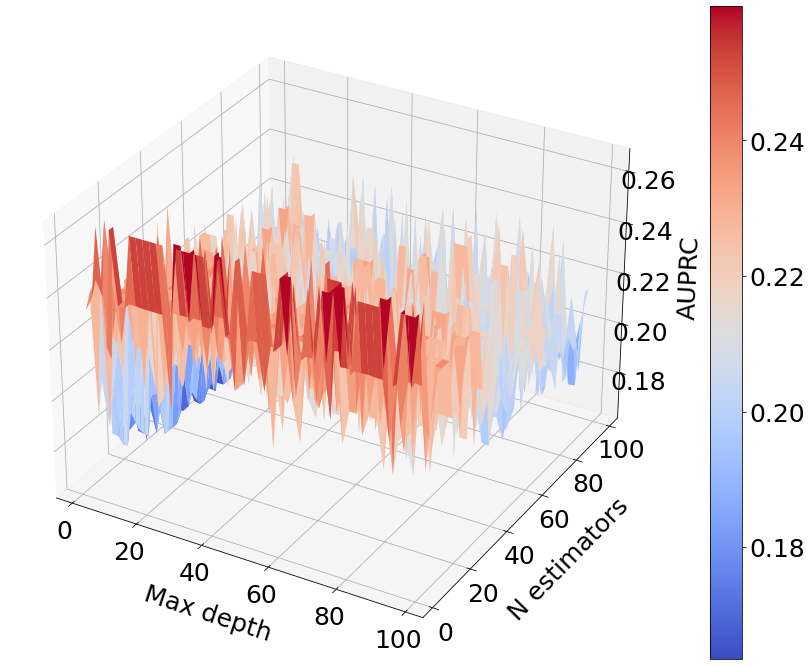

In [303]:
search_space = [(x, y) for x in max_depth_range for y in n_estimators_range]

plt.rcParams.update({'font.size': 25})
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')
X = max_depth_range
Y = n_estimators_range
X, Y = np.meshgrid(X, Y)
Z = griddata(np.array(search_space), np.array(result['auprc']), (X, Y), method='cubic')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf)
ax.set_xlabel('Max depth', labelpad=20)
ax.set_ylabel('N estimators', labelpad=20)
ax.set_zlabel('AUPRC', labelpad=20)

In [305]:
result.sort_values(by=['auprc', 'max_depth', 'n_estimators'], ascending = [False, True, True]).head(50)

,max_depth,n_estimators,auprc
98,6.0,2.0,0.266667
100,6.0,6.0,0.266667
196,10.0,2.0,0.266667
197,10.0,4.0,0.266667
343,16.0,2.0,0.266667
352,16.0,20.0,0.266667
392,18.0,2.0,0.266667
397,18.0,12.0,0.266667
441,20.0,2.0,0.266667
490,22.0,2.0,0.266667
